In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd                                

**TASK - 1**

In [8]:
# features
x = np.arange(100, 500, 5)
              
# variables
y = np.arange(600, 1000, 5)

x, y

(array([100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160,
        165, 170, 175, 180, 185, 190, 195, 200, 205, 210, 215, 220, 225,
        230, 235, 240, 245, 250, 255, 260, 265, 270, 275, 280, 285, 290,
        295, 300, 305, 310, 315, 320, 325, 330, 335, 340, 345, 350, 355,
        360, 365, 370, 375, 380, 385, 390, 395, 400, 405, 410, 415, 420,
        425, 430, 435, 440, 445, 450, 455, 460, 465, 470, 475, 480, 485,
        490, 495]),
 array([600, 605, 610, 615, 620, 625, 630, 635, 640, 645, 650, 655, 660,
        665, 670, 675, 680, 685, 690, 695, 700, 705, 710, 715, 720, 725,
        730, 735, 740, 745, 750, 755, 760, 765, 770, 775, 780, 785, 790,
        795, 800, 805, 810, 815, 820, 825, 830, 835, 840, 845, 850, 855,
        860, 865, 870, 875, 880, 885, 890, 895, 900, 905, 910, 915, 920,
        925, 930, 935, 940, 945, 950, 955, 960, 965, 970, 975, 980, 985,
        990, 995]))

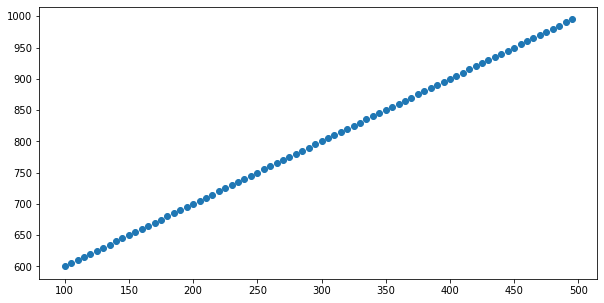

In [10]:
#plotting
plt.figure(figsize=(10, 5))
plt.scatter(x, y)
plt.show()

In [11]:
len(x), len(y)

(80, 80)

In [12]:
# split the data into training and test data
# 70% of data is train data
x_train = x[:42]
y_train = y[:42]

# 30% of data is test data
x_test = x[42:]
y_test = y[42:]

len(x_train), len(x_test)

(42, 38)

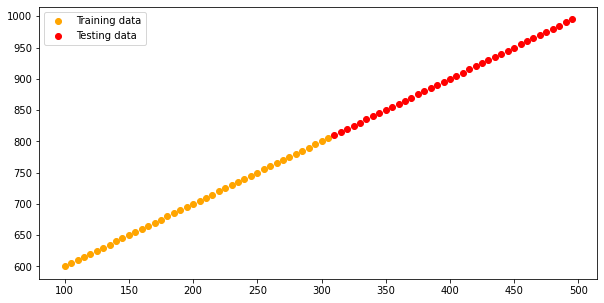

In [13]:
# visualizing train and test data
plt.figure(figsize = (10, 5))
plt.scatter(x_train, y_train, color = 'orange', label = 'Training data')
plt.scatter(x_test, y_test, color = 'red', label = 'Testing data')
plt.legend();

In [14]:
# set random seed
tf.random.set_seed(42) # global operator seed

# create a model using the sequential API
model = tf.keras.Sequential([tf.keras.layers.Dense(1, input_shape = [1])])

# compile a model 
model.compile(loss = tf.keras.losses.mae, 
              optimizer = tf.keras.optimizers.SGD(), 
              metrics = ["mae"])

# fitting a model
model.fit(tf.expand_dims(x, axis = -1), y, epochs = 100)

Epoch 1/100
3/3 [==============================] - 0s 4ms/step - loss: 429.9512 - mae: 429.9512
Epoch 2/100
3/3 [==============================] - 0s 3ms/step - loss: 496.0637 - mae: 496.0637
Epoch 3/100
3/3 [==============================] - 0s 4ms/step - loss: 268.5372 - mae: 268.5372
Epoch 4/100
3/3 [==============================] - 0s 3ms/step - loss: 442.6712 - mae: 442.6712
Epoch 5/100
3/3 [==============================] - 0s 3ms/step - loss: 282.7377 - mae: 282.7377
Epoch 6/100
3/3 [==============================] - 0s 4ms/step - loss: 463.2498 - mae: 463.2498
Epoch 7/100
3/3 [==============================] - 0s 4ms/step - loss: 415.8127 - mae: 415.8127
Epoch 8/100
3/3 [==============================] - 0s 4ms/step - loss: 405.3022 - mae: 405.3022
Epoch 9/100
3/3 [==============================] - 0s 4ms/step - loss: 460.3022 - mae: 460.3022
Epoch 10/100
3/3 [==============================] - 0s 3ms/step - loss: 414.5208 - mae: 414.5208
Epoch 11/100
3/3 [=====================

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


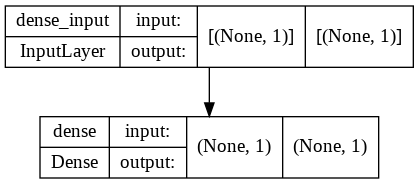

In [17]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes = True)

In [18]:
y_pred = model.predict(x_test)
y_pred

array([[1452.4404],
       [1475.861 ],
       [1499.2816],
       [1522.7023],
       [1546.1228],
       [1569.5435],
       [1592.964 ],
       [1616.3846],
       [1639.8052],
       [1663.2258],
       [1686.6464],
       [1710.067 ],
       [1733.4877],
       [1756.9082],
       [1780.3289],
       [1803.7494],
       [1827.17  ],
       [1850.5906],
       [1874.0112],
       [1897.4319],
       [1920.8524],
       [1944.2731],
       [1967.6936],
       [1991.1143],
       [2014.5348],
       [2037.9554],
       [2061.376 ],
       [2084.7966],
       [2108.217 ],
       [2131.6377],
       [2155.0583],
       [2178.479 ],
       [2201.8994],
       [2225.32  ],
       [2248.7407],
       [2272.1614],
       [2295.582 ],
       [2319.0024]], dtype=float32)

In [19]:
def plot_predictions(train_data = x_train,
                     train_labels = y_train,
                     test_data = x_test,
                     test_labels = y_test,
                     predictions = y_pred):
  #plt.figure(figsize = (10, 5))
  plt.scatter(train_data, train_labels, color = 'orange', label = 'Training data')
  plt.scatter(test_data, test_labels, color = 'red', label = 'Testing data')
  plt.scatter(test_data, predictions, color = 'green', label = 'Prediction data')
  plt.legend();

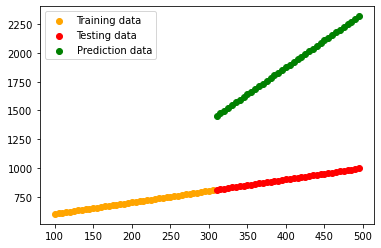

In [20]:
plot_predictions(train_data = x_train,
                     train_labels = y_train,
                     test_data = x_test,
                     test_labels = y_test,
                     predictions = y_pred)

In [21]:
# evaluate on test data set
model.evaluate(x_test, y_test)

2/2 [==============================] - 0s 4ms/step - loss: 983.2215 - mae: 983.2215


[983.2214965820312, 983.2214965820312]

In [22]:
# calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true = y, y_pred = y_pred)
mae

<tf.Tensor: shape=(38,), dtype=float32, numpy=
array([ 654.9404 ,  678.36096,  701.7816 ,  725.2023 ,  748.62286,
        772.04346,  795.464  ,  818.88464,  842.3052 ,  865.72577,
        889.14636,  912.5671 ,  935.9876 ,  959.4082 ,  982.8289 ,
       1006.2493 , 1029.67   , 1053.0906 , 1076.5114 , 1099.9319 ,
       1123.3524 , 1146.7732 , 1170.1936 , 1193.6143 , 1217.0349 ,
       1240.4553 , 1263.876  , 1287.2966 , 1310.717  , 1334.1377 ,
       1357.5583 , 1380.9789 , 1404.3994 , 1427.8201 , 1451.2406 ,
       1474.6614 , 1498.082  , 1521.5023 ], dtype=float32)>

In [23]:
# check the tensor shape
y_test.shape, y_pred.shape

((38,), (38, 1))

In [24]:
# shape after squeeze
y_pred.squeeze().shape

(38,)

In [25]:
y_test, y_pred.squeeze()

(array([810, 815, 820, 825, 830, 835, 840, 845, 850, 855, 860, 865, 870,
        875, 880, 885, 890, 895, 900, 905, 910, 915, 920, 925, 930, 935,
        940, 945, 950, 955, 960, 965, 970, 975, 980, 985, 990, 995]),
 array([1452.4404, 1475.861 , 1499.2816, 1522.7023, 1546.1228, 1569.5435,
        1592.964 , 1616.3846, 1639.8052, 1663.2258, 1686.6464, 1710.067 ,
        1733.4877, 1756.9082, 1780.3289, 1803.7494, 1827.17  , 1850.5906,
        1874.0112, 1897.4319, 1920.8524, 1944.2731, 1967.6936, 1991.1143,
        2014.5348, 2037.9554, 2061.376 , 2084.7966, 2108.217 , 2131.6377,
        2155.0583, 2178.479 , 2201.8994, 2225.32  , 2248.7407, 2272.1614,
        2295.582 , 2319.0024], dtype=float32))

In [26]:
# calculate model metrics

def mae(y_test, y_pred):
  return tf.metrics.mean_absolute_error(y_test, y_pred)

def mse(y_test, y_pred):
  return tf.metrics.mean_squared_error(y_test, y_pred)
  
mae = mae(y_test, y_pred.squeeze()).numpy()
mse = mse(y_test, y_pred.squeeze()).numpy()
mae, mse

(983.2215, 1007527.56)

**TASK - 2**

In [27]:
# set the random seed (42)
tf.random.set_seed(42)

# adding a second layer
model_2 = tf.keras.Sequential([tf.keras.layers.Dense(1), 
                               tf.keras.layers.Dense(1),
                               tf.keras.layers.Dense(1), 
                               tf.keras.layers.Dense(1)])

# compile the model
model_2.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['mae'])

# fitting a model
hist = model.fit(tf.expand_dims(x, axis = -1), y, epochs = 100)

Epoch 1/100
3/3 [==============================] - 0s 4ms/step - loss: 290.5739 - mae: 290.5739
Epoch 2/100
3/3 [==============================] - 0s 3ms/step - loss: 476.6328 - mae: 476.6328
Epoch 3/100
3/3 [==============================] - 0s 3ms/step - loss: 353.0845 - mae: 353.0845
Epoch 4/100
3/3 [==============================] - 0s 3ms/step - loss: 411.6833 - mae: 411.6833
Epoch 5/100
3/3 [==============================] - 0s 3ms/step - loss: 306.6586 - mae: 306.6586
Epoch 6/100
3/3 [==============================] - 0s 4ms/step - loss: 397.5021 - mae: 397.5021
Epoch 7/100
3/3 [==============================] - 0s 3ms/step - loss: 403.3903 - mae: 403.3903
Epoch 8/100
3/3 [==============================] - 0s 4ms/step - loss: 281.7503 - mae: 281.7503
Epoch 9/100
3/3 [==============================] - 0s 3ms/step - loss: 443.5534 - mae: 443.5534
Epoch 10/100
3/3 [==============================] - 0s 3ms/step - loss: 154.5588 - mae: 154.5588
Epoch 11/100
3/3 [=====================

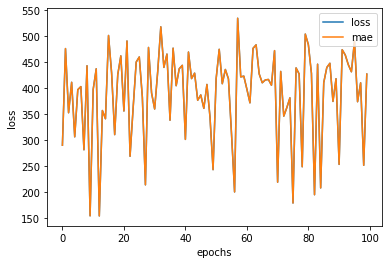

In [29]:
# plot the history (also known as loss curve)
pd.DataFrame(hist.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')
plt.show()

**TASK - 3**

**Boston Housing Data**

In [2]:
from keras.datasets import boston_housing

In [3]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.boston_housing.load_data(path="boston_housing.npz",test_split=0.3,seed=42)

In [4]:
print(x_train.shape, y_train.shape)

(354, 13) (354,)


In [5]:
print(x_test.shape,y_test.shape)

(152, 13) (152,)


**Dense layer 1**

In [6]:

housing_model = tf.keras.Sequential([tf.keras.layers.Dense(1)])

# compile the model
housing_model.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ['mae'])

# fitting the model
history=housing_model.fit(x_train, y_train, epochs = 100) 

Epoch 1/100
12/12 [==============================] - 0s 2ms/step - loss: 1355.9629 - mae: 1355.9629
Epoch 2/100
12/12 [==============================] - 0s 2ms/step - loss: 1530.4896 - mae: 1530.4896
Epoch 3/100
12/12 [==============================] - 0s 2ms/step - loss: 1463.0375 - mae: 1463.0375
Epoch 4/100
12/12 [==============================] - 0s 2ms/step - loss: 1408.8344 - mae: 1408.8344
Epoch 5/100
12/12 [==============================] - 0s 2ms/step - loss: 1472.8196 - mae: 1472.8196
Epoch 6/100
12/12 [==============================] - 0s 1ms/step - loss: 1502.0586 - mae: 1502.0586
Epoch 7/100
12/12 [==============================] - 0s 2ms/step - loss: 1470.9447 - mae: 1470.9447
Epoch 8/100
12/12 [==============================] - 0s 2ms/step - loss: 1538.5044 - mae: 1538.5044
Epoch 9/100
12/12 [==============================] - 0s 2ms/step - loss: 1520.5049 - mae: 1520.5049
Epoch 10/100
12/12 [==============================] - 0s 2ms/step - loss: 1472.3232 - mae: 1472.3232

In [7]:
housing_model_loss, housing_model_mae = housing_.evaluate(x_test, y_test)
insurance_model_2_mae

housing_model.evaluate(x_test, y_test)

5/5 [==============================] - 0s 4ms/step - loss: 831.4987 - mae: 831.4987


[831.4986572265625, 831.4986572265625]

Text(0.5, 0, 'epochs')

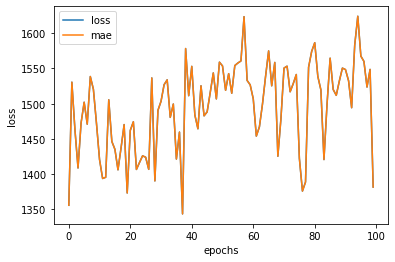

In [8]:
# plot the history (also known as loss curve)
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

**Dense layer 2**

In [9]:
housing_model1 = tf.keras.Sequential([tf.keras.layers.Dense(1),tf.keras.layers.Dense(1)])   

# compile the model
housing_model1.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ['mae'])

# fitting the model
history1=housing_model1.fit(x_train, y_train, epochs = 100) 

Epoch 1/100
12/12 [==============================] - 1s 4ms/step - loss: 1364860612902912.0000 - mae: 1364860612902912.0000
Epoch 2/100
12/12 [==============================] - 0s 3ms/step - loss: 733273201517541886389426036146176.0000 - mae: 733273201517541886389426036146176.0000
Epoch 3/100
12/12 [==============================] - 0s 2ms/step - loss: inf - mae: inf                                                                          
Epoch 4/100
12/12 [==============================] - 0s 2ms/step - loss: inf - mae: inf
Epoch 5/100
12/12 [==============================] - 0s 3ms/step - loss: nan - mae: nan
Epoch 6/100
12/12 [==============================] - 0s 3ms/step - loss: nan - mae: nan
Epoch 7/100
12/12 [==============================] - 0s 3ms/step - loss: nan - mae: nan
Epoch 8/100
12/12 [==============================] - 0s 6ms/step - loss: nan - mae: nan
Epoch 9/100
12/12 [==============================] - 0s 4ms/step - loss: nan - mae: nan
Epoch 10/100
12/12 [========

In [10]:
housing_model1.evaluate(x_test, y_test)

5/5 [==============================] - 0s 3ms/step - loss: nan - mae: nan


[nan, nan]

Text(0.5, 0, 'epochs')

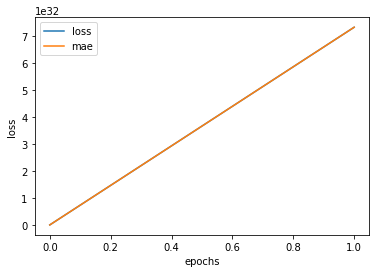

In [11]:
# plot the history (also known as loss curve)
pd.DataFrame(history1.history).plot()               
plt.ylabel('loss')
plt.xlabel('epochs')

**Dense layer 3**

In [12]:
housing_model2 = tf.keras.Sequential([tf.keras.layers.Dense(1),tf.keras.layers.Dense(1),tf.keras.layers.Dense(1)])   

# compile the model
housing_model2.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ['mae'])

# fitting the model
history2=housing_model2.fit(x_train, y_train, epochs = 100) 

Epoch 1/100
12/12 [==============================] - 1s 2ms/step - loss: nan - mae: nan    
Epoch 2/100
12/12 [==============================] - 0s 5ms/step - loss: nan - mae: nan
Epoch 3/100
12/12 [==============================] - 0s 4ms/step - loss: nan - mae: nan
Epoch 4/100
12/12 [==============================] - 0s 3ms/step - loss: nan - mae: nan
Epoch 5/100
12/12 [==============================] - 0s 6ms/step - loss: nan - mae: nan
Epoch 6/100
12/12 [==============================] - 0s 4ms/step - loss: nan - mae: nan
Epoch 7/100
12/12 [==============================] - 0s 3ms/step - loss: nan - mae: nan
Epoch 8/100
12/12 [==============================] - 0s 3ms/step - loss: nan - mae: nan
Epoch 9/100
12/12 [==============================] - 0s 3ms/step - loss: nan - mae: nan
Epoch 10/100
12/12 [==============================] - 0s 3ms/step - loss: nan - mae: nan
Epoch 11/100
12/12 [==============================] - 0s 3ms/step - loss: nan - mae: nan
Epoch 12/100
12/12 [======

In [13]:
housing_model2.evaluate(x_test, y_test)

5/5 [==============================] - 0s 2ms/step - loss: nan - mae: nan


[nan, nan]

Text(0.5, 0, 'epochs')

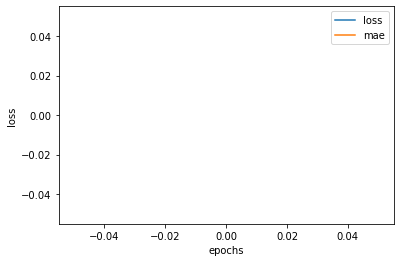

In [14]:
# plot the history (also known as loss curve)
pd.DataFrame(history2.history).plot()               
plt.ylabel('loss')
plt.xlabel('epochs')

**Dense layer 4**

In [15]:
housing_model3 = tf.keras.Sequential([tf.keras.layers.Dense(1),tf.keras.layers.Dense(1),tf.keras.layers.Dense(1),tf.keras.layers.Dense(1)])   

# compile the model
housing_model3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ['mae'])

# fitting the model
history3=housing_model3.fit(x_train, y_train, epochs = 100) 

Epoch 1/100
12/12 [==============================] - 0s 2ms/step - loss: nan - mae: nan      
Epoch 2/100
12/12 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 3/100
12/12 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 4/100
12/12 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 5/100
12/12 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 6/100
12/12 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 7/100
12/12 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 8/100
12/12 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 9/100
12/12 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 10/100
12/12 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 11/100
12/12 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 12/100
12/12 [====

In [16]:
housing_model3.evaluate(x_test, y_test)

5/5 [==============================] - 0s 2ms/step - loss: nan - mae: nan


[nan, nan]

Text(0.5, 0, 'epochs')

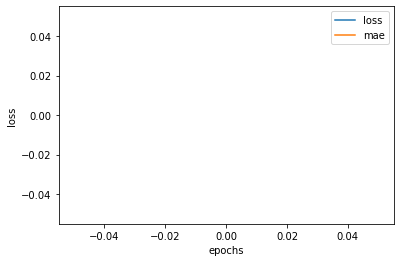

In [17]:
# plot the history (also known as loss curve)
pd.DataFrame(history3.history).plot()               
plt.ylabel('loss')
plt.xlabel('epochs')